In [1]:
%cd ..

/home/gianscarpe/dev/event-camera/src


In [26]:
from experimenting.dataset.factory import (
        AutoEncoderConstructor,
        ClassificationConstructor,
        HeatmapConstructor,
        Joints3DConstructor,
        JointsConstructor
)
from omegaconf import DictConfig

data_dir = '/data/gscarpellini/dhp19/time_count_dataset/movements_per_frame'
labels_dir = '/data/gscarpellini/dhp19/time_count_dataset/labels'
joints_dir = '/data/gscarpellini/dhp19/time_count_dataset/labels_joints'
hparams = DictConfig({
        'dataset': {
                'data_dir': data_dir,
                'joints_dir': joints_dir,
                'save_split': False,
                'labels_dir': labels_dir,
                'hm_dir': labels_dir,
                'test_subjects': [1, 2, 3, 4, 5],
                'split_at': 0.8,
                'cams': [3],
                'params_class': 'DHP19Core'
        },
        'augmentation_train': {
                'info': {},
                'apply': {'aug1': {'cls': 'albumentations.CenterCrop', 'params':
                                   {'height': 256, 'width': 256, 'p': 1}},
                          'aug2': {'cls':'albumentations.pytorch.ToTensor'}}
        },
        'augmentation_test': {
                'info': {},
                'apply': {}
        }
})
data_constructor = JointsConstructor(hparams)

.npy|.mat


In [ ]:
train, val , test = data_constructor.get_datasets()

In [20]:
x, y, m = train[0]

In [2]:
from experimenting.dataset import get_dataloader, DHPJointsDataset
from experimenting.dataset.params_utils import get_dataset_params
from matplotlib import pyplot as plt
import numpy as np
from albumentations import Compose, CenterCrop
from albumentations.pytorch import ToTensor
import torch
from importlib import reload  
from experimenting.models import metrics
from experimenting.models import losses
from kornia import geometry
from omegaconf import DictConfig
import kornia
from experimenting.utils import get_file_paths
import numpy as np

%matplotlib inline

ImportError: cannot import name 'DHPJointsDataset' from 'experimenting.dataset' (/home/gianscarpe/dev/event-camera/src/experimenting/dataset/__init__.py)

In [4]:
def display(img):          
        fig, ax = plt.subplots(ncols=img.shape[0], nrows=1,                              
                               figsize=(20,20))                                                                                   
        for i in range(img.shape[0]):                                                                
            ax[i].imshow(img[i])                                                  
            ax[i].axis('off')
        plt.show()
def plot_2d(dvs_frame, sample_gt, sample_pred):
    " To plot image and 2D ground truth and prediction "
    plt.figure()
    plt.imshow(dvs_frame, cmap='gray')
    plt.plot(sample_gt[:,1], sample_gt[:,0], '.', c='red', label='gt')
    plt.plot(sample_pred[:,1], sample_pred[:,0], '.', c='blue', label='pred')
    plt.legend()

In [5]:
# Augmentation
aug = Compose([ToTensor()])

In [6]:
data_dir = '/data/dhp19/time_count_dataset/movements_per_frame'
labels_dir = "/data/dhp19/time_count_dataset/labels_full_joints/"
test_subjects = [1, 2, 3, 4, 5]
cams = [2, 3]
max_h = 959.81
max_w = 867.40
max_d = 2238.23

batch_size = 16

hparams = DictConfig({'data_dir': data_dir, 'save_split':False, 'max_d':max_d,
                      'max_h':max_h, 'max_w': max_w, 'labels_dir' :
                      labels_dir, 'test_subjects':test_subjects, 'split_at':0.8, 'cams': cams})
params = get_dataset_params(hparams)

.npy|.mat


In [7]:
indexes = np.concatenate([params['train_indexes'], params['val_indexes']])

In [8]:
d = DHPJointsDataset(file_paths = params['file_paths'], labels_dir = labels_dir,
                     indexes=params['test_indexes'], max_w= max_w, max_h= max_h,
                     transform=aug)
loader = get_dataloader(d, batch_size, 2)

In [524]:
batch = next(iter(loader))
x, y, m = batch

# Test

In [480]:
from pose3d_utils.skeleton_normaliser import SkeletonNormaliser
from pose3d_utils.camera import CameraIntrinsics

In [452]:
s = SkeletonNormaliser()

In [472]:
yt = np.concatenate([y['xyz'], np.ones((1, 13)) ])
y = M.dot(yt)


In [503]:
#skeelton
skeleton = np.concatenate([y, np.ones((1, 13)) ]).swapaxes(0, 1)
#depth
z_ref = 2853
#h
height = 256
width = 256
#intr
camera = CameraIntrinsics(torch.tensor(bnp.concatenate([K, np.zeros((3, 1)) ],
                                                      axis=1)) )

In [505]:
n = s.normalise_skeleton(torch.tensor(skeleton), z_ref, camera, height, width)

In [506]:
s.denormalise_skeleton(n, z_ref, camera, height, width)

tensor([[-4.7225e+01, -6.8450e+02,  2.8540e+03,  1.0000e+00],
        [ 1.8078e+02, -4.3547e+02,  2.9805e+03,  1.0000e+00],
        [-7.3541e+01, -5.8244e+02,  3.1666e+03,  1.0000e+00],
        [ 3.8864e+02, -3.4739e+02,  3.1975e+03,  1.0000e+00],
        [-3.2393e+01, -5.0766e+02,  3.4474e+03,  1.0000e+00],
        [ 1.3886e+02, -1.0007e+02,  3.2464e+03,  1.0000e+00],
        [-4.7059e+01, -1.8356e+02,  3.3878e+03,  1.0000e+00],
        [ 4.9648e+02, -7.4138e+01,  3.2529e+03,  1.0000e+00],
        [-1.3820e+02, -3.5746e+02,  3.6709e+03,  1.0000e+00],
        [ 6.1916e+01,  3.1874e+02,  3.4282e+03,  1.0000e+00],
        [-9.3804e+01,  2.7155e+02,  3.5520e+03,  1.0000e+00],
        [ 4.1933e+01,  7.0362e+02,  3.5826e+03,  1.0000e+00],
        [-1.3423e+02,  6.3978e+02,  3.7041e+03,  1.0000e+00]],
       dtype=torch.float64)

# Eval hourglass model

In [90]:
%ls /home/gianscarpe/dev/exps/timecount_pose/exps_HourglassModel

exp_Adam_0.0003_no_aug_05-28-14-56/  exp_Adam_0.0003_no_aug_06-12-11-38/
exp_Adam_0.0003_no_aug_05-28-15-17/  exp_SGD_0.001_no_aug_05-28-14-13/
exp_Adam_0.0003_no_aug_05-28-15-19/  exp_SGD_0.001_no_aug_05-28-14-15/
exp_Adam_0.0003_no_aug_05-28-15-21/  exp_SGD_0.001_no_aug_05-28-14-24/
exp_Adam_0.0003_no_aug_05-28-15-40/  exp_SGD_0.001_no_aug_05-28-15-48/
exp_Adam_0.0003_no_aug_05-28-15-44/  exp_SGD_0.01_no_aug_05-22-11-05/
exp_Adam_0.0003_no_aug_06-01-08-49/  exp_SGD_0.01_no_aug_05-26-09-51/
exp_Adam_0.0003_no_aug_06-03-14-53/  exp_SGD_0.01_no_aug_05-28-11-28/
exp_Adam_0.0003_no_aug_06-11-14-22/  exp_SGD_0.1_no_aug_05-28-15-56/
exp_Adam_0.0003_no_aug_06-11-14-59/  exp_SGD_0.1_no_aug_05-29-10-56/
exp_Adam_0.0003_no_aug_06-12-10-00/  exp_SGD_0.1_no_aug_05-30-10-37/
exp_Adam_0.0003_no_aug_06-12-10-08/  with_errors/
exp_Adam_0.0003_no_aug_06-12-10-10/


In [30]:
import experimenting.models as models
import os
import experimenting.models.metrics as metrics
import experimenting.models.losses as losses
from experimenting.utils import get_joints_from_heatmap, average_loss

#exp_name = 'exps_HourglassModel/exp_Adam_0.0003_no_aug_05-25-12-57'
exp_name = 'exps_HourglassModel/exp_Adam_0.0003_no_aug_06-12-10-10'
checkpoint_dir = f'/home/gianscarpe/dev/exps/timecount_pose/{exp_name}/checkpoints'
checkpoints = sorted(os.listdir(checkpoint_dir))
checkpoint_path = os.path.join(checkpoint_dir, checkpoints[0])
model = models.HourglassEstimator.load_from_checkpoint(checkpoint_path)
model = model.cpu()

In [31]:
checkpoint_path

'/home/gianscarpe/dev/exps/timecount_pose/exps_HourglassModel/exp_Adam_0.0003_no_aug_06-12-10-10/checkpoints/epoch=00-val_loss=1.63.ckpt'

In [32]:
mpjpe = metrics.MPJPE(reduction=average_loss)

In [33]:
with torch.no_grad():
    preds = model(x.cpu())[-1]

In [106]:
p_joints =  geometry.denormalize_pixel_coordinates(geometry.spatial_expectation2d(preds), d.max_h, d.max_w) 
gt_joints = geometry.denormalize_pixel_coordinates(y, d.max_h, d.max_w)

AttributeError: 'NpzFile' object has no attribute 'shape'

In [46]:
mpjpe(p_joints, gt_joints, m)

tensor(279.9998, dtype=torch.float64)

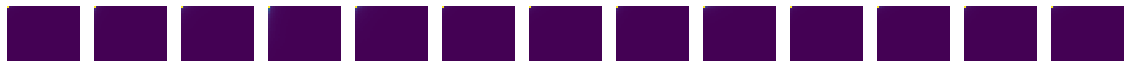

In [38]:
display(preds[10].numpy())

In [446]:
for i in range(batch_size):
    display(preds[i].numpy())
    plot_2d(x[i].squeeze(), p_joints[i], gt_joints[i])

NameError: name 'preds' is not defined